# Darcy-Weisbach Equation
The Darcy-Weisbach equation relates the head or pressure loss, resulting from friction along a length of conduit, to the average velocity of an incompressible fluid flow.  This equation is typically not suitable for gas flow.

## Head Loss Form
$$h_f = f_D \cdot \frac{L}{D_h} \cdot \frac{V^2}{2g}$$
where;

* $h_f$ is the head loss due to friction (SI units: m); Note: This is also proportional to the piezometric head along the pipe;
* $L$ is the length of the pipe (m);
* $D_h$ is the hydraulic diameter of the pipe (for a pipe of circular section, this equals the internal diameter of the pipe) (m);
* $V$ is the average flow velocity, experimentally measured as the volumetric flow rate per unit cross-sectional wetted area (m/s);
* $g$ is the local acceleration due to gravity $(m/s^2)$;
* $f_D$ is a dimensionless parameter called the Darcy friction factor, resistance coefficient, or simply friction factor.[3]

The Darcy friction factor $(f_D)$ can be found from a Moody diagram or it can be calculated (see below).

## Pressure Loss Form
$$\Delta p = \rho \cdot g \cdot h_f$$
where the pressure loss due to friction $Δp$ (Pa) is a function of:

* the ratio of the length to diameter of the pipe, $L / D$;
* the density of the fluid, $ρ$ (kg/m3);
* the mean flow velocity, $V$ (m/s), as defined above;
* Darcy Friction Factor, $f_D$, as defined above;

# Calculation of Friction Factor $(f_D)$

Calculation method for the friction factor depends on the flow regime as defined by the Reynolds number $(R_e)$

\begin{align}
    \mathrm{Re} &= \frac{\rho}{\mu} V D = \frac{VD}{\nu} \\
    \nu &= \frac{\mu}{\rho}
\end{align}

where;
* $\mu$ is the dynamic viscosity, implies a linear relationshipe between distance from fluid velocity at the wall $(u)$ and distance from the wall $(y)$: $\mu = \frac{\partial u}{\partial y}$.  Dynamic viscosity has units of pascal-seconds (Pa-s) or centipoise (cP).
* $\nu$ is the kinematic viscosity, which has units of $m^2/s$ or stokes 

## Flow Regimes

For this analysis, I will segregate the flow regimes as follows:

* $R_e < 2,000 \implies$ Laminar regime
* $2,000 < R_e \implies$ Turbulent regime

Note: for $2,000 < R_e < 3,000 $ is typically referred to as a Critical regime, which is not defined  with this approach.

## Formulas

### Laminar Flow
Equation for flow in the laminar regime (as defined above) as defined by Poiseuille's law for laminar flow is:
$$f_D = \frac{64}{R_e}$$

### Turbulent Flow
Equation for flow in the turbulent regime (as defined above) as defined by the Coleboork-White equation is:
$$\frac{1}{\sqrt{f_D}} = -2.00 \log_{10}\left(\frac{\epsilon}{3.7D_h} + \frac{2.51}{\mathrm{Re}\sqrt{f_D}}\right)$$

# Calculations

load and defined needed packages

In [1]:
import numpy as np
from pint import UnitRegistry
import math
ureg = UnitRegistry()
np.set_printoptions(precision=4)

## Check Units

calculation of Reynolds number

In [2]:
rho = 1000 * ureg.kilogram / ureg.meter**3# kg/m3
v = 4.0 *ureg.meter / ureg.sec# m/sec
mu = 8.90 * 10**-4 * ureg.pascal * ureg.sec# Pa-s, N-s/m2
d = 0.2 * ureg.meter

Re = rho * v * d / mu
print(Re.dimensionality) # check dimension
print(Re.magnitude)

dimensionless
898876.404494


## Function for the Evaluation of the Darcy-Weisbach Friction Factor

In [77]:
def f_cw(Re, d, epsilon):
    """
    Function to obtain the Darcy-Weisbach friction factor:
        Laminar Flow (Re <= 2000) -> Poiseuille's relationship
        Turbulent Flow (Re > 2000) -> evaluate the colebrrok-white equation 

    Input:
    -------------------------------------------------
    Re (required): reynolds number (dimensionless)
    d  (required): hydraulic diameter (length)
    epsilon (required): conduit roughness (length)
    
    Output:
    -------------------------------------------------
    f: darcy-weisbach friction factor (dimensionless)
    """


    if Re <= 2000.:
        f = Re / 64.
    else:
        sqrt_f = 10.0
        loop_max = 20
        inc = 1
        res = 10.0

        while res > 10**-8 and inc < loop_max:
            LHS = -2.0 * np.log10(epsilon / (3.7 * d) + 2.51 / (Re * sqrt_f))
            res = (LHS - 1./sqrt_f)**2 #squared error
            sqrt_f = 1./LHS
            inc = inc + 1
        f = sqrt_f**2

        if inc == loop_max:
            print("Friction Factor Did Not Converge!")
            print("Value Should = unity:")
            print(-2.0 * np.log(epsilon / (3.7 * d) + 2.51 / (Re * f**0.5)) * f**0.5)
    f_out = f
    return f_out

## Example

Calculate the head loss from friction over a range of flow rates

In [83]:
rho = 1200 # kg/m3
v = np.linspace(0., 5., 101) # m/sec
mu = 8.90 * 10**-4 # Pa-s, N-s/m2
d = 0.2 # m
epsilon = 0.005 # roughness
l = 1000. # conduit lenth (m)
g = 9.81 #m/s2

fric_fact = np.zeros(len(v))

for i in xrange(len(v)):
    Re = rho * v[i] * d / mu
    fric_fact[i]= f_cw(Re, d, epsilon)
    
h_f = fric_fact*(l/d)*(v**2/2*g)
dp = rho * g * h_f

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

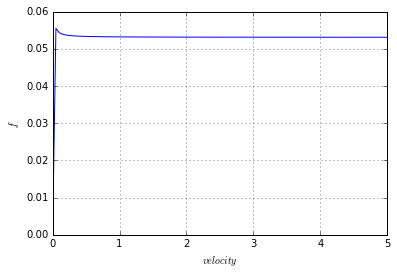

In [85]:
plt.plot(v,fric_fact)

plt.xlabel('$velocity$')
plt.ylabel('$f$')
plt.grid()

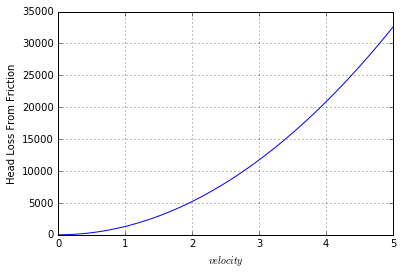

In [88]:
plt.plot(v,h_f)

plt.xlabel('$velocity$')
plt.ylabel('Head Loss From Friction')
plt.grid()